In [5]:
import graph_tool.all as gt
import networkx as nx
import matplotlib.pyplot as plt
import math

In [31]:
%matplotlib inline

### Read data

In [7]:
yeast_g = gt.load_graph(file_name="data/yeast8k.graphml")
ecoli_g = gt.load_graph(file_name="data/ecoli2k.graphml")
mouse_g = gt.load_graph(file_name="data/mouse_vc.graphml")
fbego_g = gt.load_graph(file_name="data/fbego.graphml")
bitc_g  = gt.load_graph(file_name="data/bc.graphml")
pydep_g = gt.load_graph(file_name="data/pydep.graphml")

In [8]:
no_self_yeast_g = yeast_g.copy()
no_self_ecoli_g = ecoli_g.copy()
no_self_mouse_g = mouse_g.copy()
no_self_fbego_g = fbego_g.copy()
no_self_bitc_g  = bitc_g.copy()
no_self_pydep_g = pydep_g.copy()
for a_graph in [no_self_yeast_g,no_self_ecoli_g,no_self_mouse_g,no_self_fbego_g,no_self_bitc_g,no_self_pydep_g]:
    gt.remove_self_loops(a_graph)

### Find subsgraphs and motifs

In [9]:
subg_size = 3
graph = no_self_yeast_g

motiflist   = gt.motifs(graph,subg_size,return_maps=True)

In [20]:
motifs_nx = list()
for subg in motiflist[0]:
    el = list() 
    el += subg.iter_edges()
    motifs_nx += [nx.from_edgelist(el,create_using=nx.DiGraph())]
print(len(motifs_nx))

11


In [ ]:
sig_list = gt.motif_significance(graph,subg_size,shuffle_model="erdos")

### Plot

In [93]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 450

In [95]:
def qt_draw(g,axis_pos):
    pos = nx.spring_layout(g)
    nx.draw_networkx(G=g, pos=pos,node_size=100, ax=axis_pos, with_labels=False,connectionstyle="arc3,rad=0.2",node_color="#750101",edgecolors="#000000")


Text(0.5, 1.0, 'Z-scores')

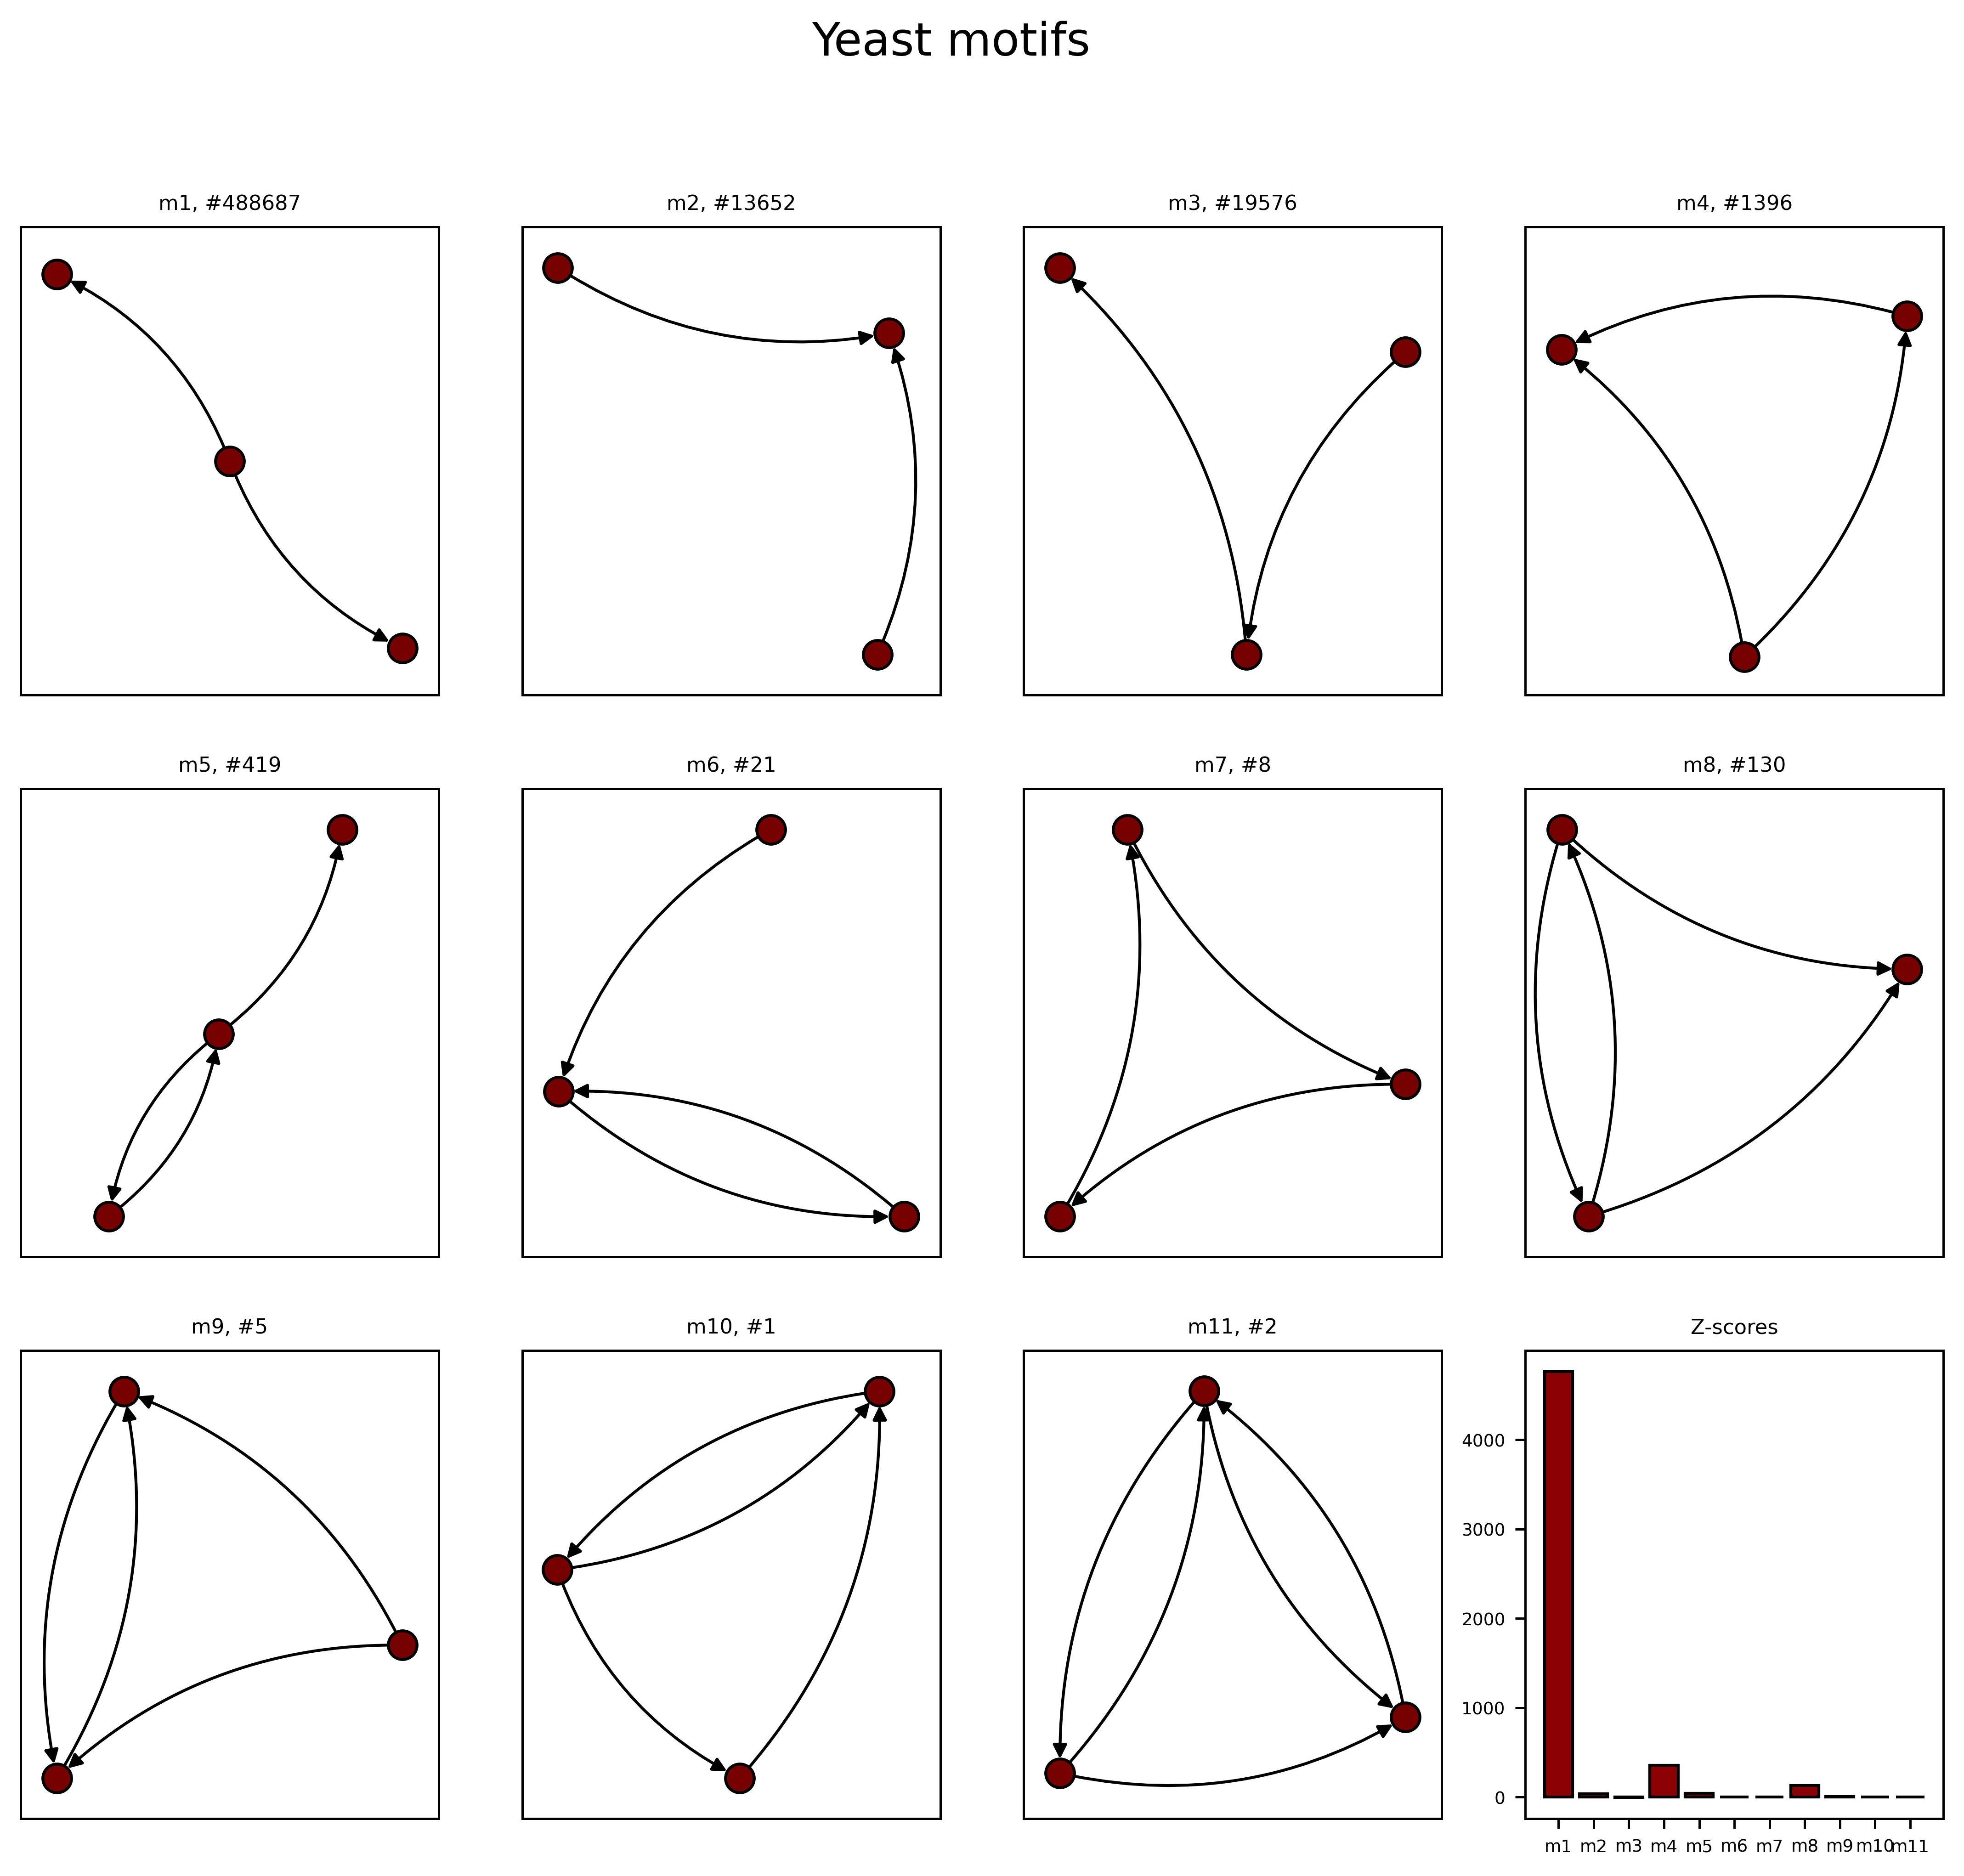

In [98]:
n_motifs    = len(motiflist[0])
base        = math.ceil(math.sqrt(n_motifs))
height      = math.ceil(n_motifs/base)
fig, ax     = plt.subplots(height, base, figsize=(12, 10))
fig.suptitle("Yeast motifs",fontsize=16)
for i,motif in enumerate(motifs_nx,1):
    try:
        y = ((i-1) % base)
        x = math.floor((i-1)/base)
        ax[x,y].set_title(f"m{i}, #{motiflist[1][i-1]}")
        # gt.graph_draw(motif,mplfig=ax[x,y],nodesfirst=True)
        # nx.draw_networkx(motif,ax=ax[x,y],with_labels=False)
        qt_draw(g=motif,axis_pos=ax[x,y])
    except IndexError:
        print(i,x,y)
len(sig_list[0])
n = list()
for i in range(1,n_motifs+1):
    n += [f"m{i}"]
ax[2,3].bar(n,sig_list[1],color="darkred",edgecolor="black",linewidth=1)
ax[2,3].set_title("Z-scores")